## Credit Card Clustering with Machine Learning

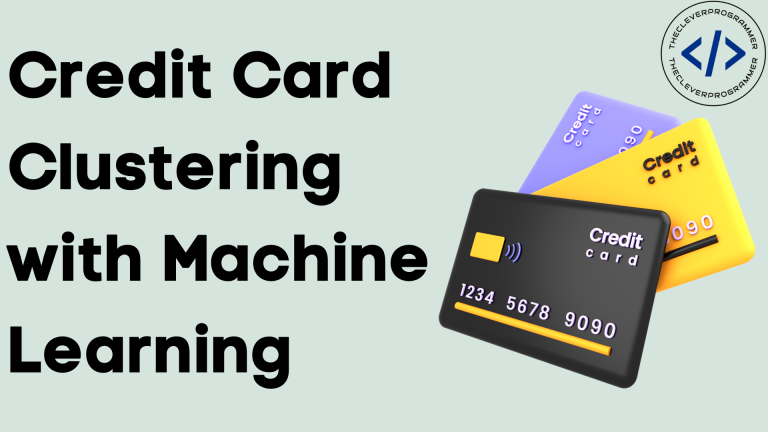

Credit card clustering is the task of grouping credit card holders based on their buying habits, credit limits, and many other financial factors. If you want to learn how to use clustering analysis to group credit card holders, this article is for you

## Credit Card Clustering

Credit card clustering means grouping credit card holders based on their buying habits, credit limits, and many more financial factors. It is also known as credit card segmentation. Such clustering analysis helps businesses find their potential customers and many more marketing strategies.

For the task of credit card clustering with Machine Learning, we need to have a dataset based on buying history of credit card holders. I found an ideal dataset for this task that contains all the necessary features that are enough to understand credit card cluster analysis. You can download the dataset from here.

In the section below, I will take you through the task of credit card clustering analysis with Machine Learning using the Python programming language.

## Credit Card Clustering using Python

Let’s start the task of credit card cluster analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster

cc = pd.read_csv("CC GENERAL.csv")
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
cc.shape

(8950, 18)

Before moving forward, let’s check whether this dataset contains any null values or not:

In [3]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The dataset has some null values in the minimum payments column. I will drop the rows with null values and move further:

In [4]:
cc = cc.dropna()

There are three features in the dataset which are very valuable for the task of credit card segmentation:

* **BALANCE:** The balance left in the accounts of credit card customers.
* **PURCHASES:** Amount of purchases made from the accounts of credit card customers.
* **CREDIT_LIMIT:** The limit of the credit card.

These three features are enough to group credit card holders as they tell us about the buying history, bank balance, and credit limit of the credit card holders. So let’s use these features to create clusters from the dataset:

In [6]:
clustering_cc = cc[["BALANCE","PURCHASES","CREDIT_LIMIT"]]

from sklearn.preprocessing import MinMaxScaler
for i in clustering_cc.columns:
    MinMaxScaler(i)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
clusters = kmeans.fit_predict(clustering_cc)

cc["CREDIT_CARD_SEGMENTS"] = clusters 

C:\Users\ahussain\AppData\Local\Temp\ipykernel_25176\4198264449.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc["CREDIT_CARD_SEGMENTS"] = clusters


I have added a new column as “CREDIT_CARD_SEGMENTS”. It contains labels about the group of credit card customers. The groups formed range from 0 to 4. For simplicity, I will transform the names of these clusters:

In [9]:
cc["CREDIT_CARD_SEGMENTS"].unique()

array([0, 1, 4, 2, 3], dtype=int32)

In [10]:
cc["CREDIT_CARD_SEGMENTS"] = cc["CREDIT_CARD_SEGMENTS"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 
                                                             3:"Cluster 4",4:"Cluster 5"} )
cc["CREDIT_CARD_SEGMENTS"].unique()

C:\Users\ahussain\AppData\Local\Temp\ipykernel_25176\3748363238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc["CREDIT_CARD_SEGMENTS"] = cc["CREDIT_CARD_SEGMENTS"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3",


array(['Cluster 1', 'Cluster 2', 'Cluster 5', 'Cluster 3', 'Cluster 4'],
      dtype=object)

Now let’s visualize the credit card clusters we found from our cluster analysis:

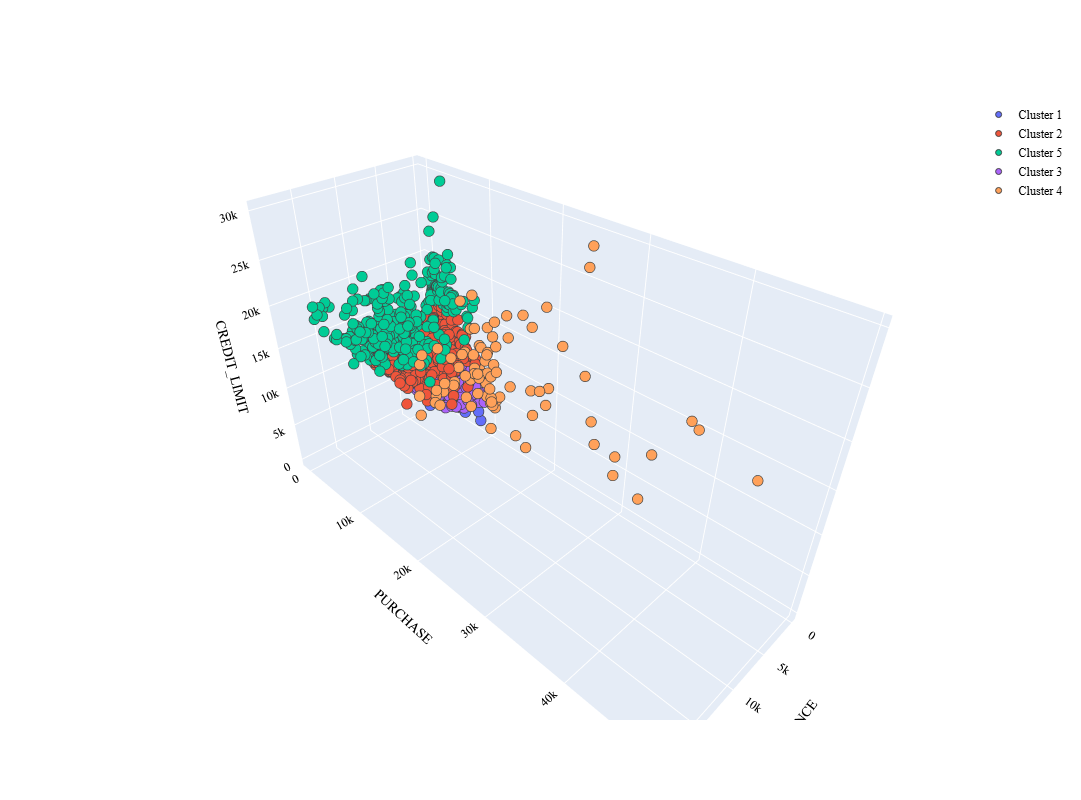

In [16]:
import plotly.graph_objects as go
Vis_cc_clusters = go.Figure()

for i in list(cc["CREDIT_CARD_SEGMENTS"].unique()):


    Vis_cc_clusters.add_trace(go.Scatter3d(
                                x = cc[cc["CREDIT_CARD_SEGMENTS"] == i]["BALANCE"],
                                y = cc[cc["CREDIT_CARD_SEGMENTS"] == i]["PURCHASES"],
                                z = cc[cc["CREDIT_CARD_SEGMENTS"] == i]["CREDIT_LIMIT"],
                                mode = "markers" , marker_size = 6 , marker_line_width = 1,
                                name = str(i)
    ))

Vis_cc_clusters.update_traces(hovertemplate = "BALANCE: %{x}  <br>PURCHASE %{y} <br>CREDIT_LIMIT: %{z}") 

Vis_cc_clusters.update_layout(width = 800 , height = 800 , autosize = True , showlegend = True,
                             scene = dict(xaxis = dict(title = "BALANCE"),
                                         yaxis = dict(title = "PURCHASE"),
                                         zaxis = dict(title = "CREDIT_LIMIT")),
                             font = dict(family = "Gilroy" , color = "black" , size = 12))

Vis_cc_clusters.show()

So this is how you can perform credit card segmentation with Machine Learning using Python.

## Summary


Credit card cluster analysis means grouping credit card holders based on their buying habits, credit limits, and many more financial factors. Such clustering analysis helps businesses find their potential customers and many more marketing strategies.